# Dados Campus Sertãozinho


In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
dados = pd.read_csv('Relatorio_novo_1.CSV')

In [230]:
dados = dados.drop(["Matrícula"],axis = 1)

In [124]:
dados = dados.loc[dados['Modalidade'] != "FIC"]

In [125]:
dados_Ele = dados.loc[dados['Descrição do Curso'] == "BACHARELADO EM ENGENHARIA ELÉTRICA"]

In [126]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

In [192]:
dados['Situação no Curso'].value_counts()

Matriculado                        335
Evasão                             191
Cancelado                          164
Formado                            144
Matrícula Vínculo Institucional     20
Transferido Interno                  8
Trancado Voluntariamente             6
Transferido Externo                  5
Cancelamento Compulsório             1
Trancado                             1
Name: Situação no Curso, dtype: int64

In [127]:
dados = dados.loc[dados['Modalidade']=='Bacharelado']
dados

,#,Matrícula,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Renda Per Capita,Sexo,Situação no Curso,Tipo de Escola de Origem
7,8,ST3059561,2023,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Branca,"SiSU L5 (SGC L3) NaN Candidatos que, independe...",Bacharelado,Brasileira,"3,28",M,Matriculado,Pública
97,98,ST3059677,2023,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,MG,Branca,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,0,M,Matriculado,Pública
101,102,ST1713566,2017,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Parda,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,"0,98",M,Evasão,Pública
106,107,ST3064832,2023,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,Brasileira,"0,62",M,Matriculado,Pública
116,117,ST1613294,2016,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Parda,Matrícula Direta (Inativa),Bacharelado,Brasileira,NaN,M,Evasão,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11880,11881,ST3026507,2021,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,Brasileira,0,F,Matriculado,Pública
11899,11900,ST1413562,2014,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,Brasileira,NaN,M,Evasão,Pública
11906,11907,ST3004031,2019,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Amarela,Ampla Concorrência SISU,Bacharelado,Brasileira,NaN,M,Matriculado,Pública
11910,11911,ST3012794,2020,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Não declarado,Ampla Concorrência SISU,Bacharelado,Brasileira,"2,51",M,Matriculado,Privada


# Filtros

In [129]:
dados = dados.drop(["Renda Per Capita"],axis = 1)

# Número de alunos

In [130]:
pip install matplotlib

In [131]:
import matplotlib.pyplot as plt

In [132]:
dados['Ano de Ingresso'].value_counts()


2017    115
2019     95
2018     94
2020     90
2022     85
2021     83
2023     80
2016     68
2013     56
2015     55
2014     54
Name: Ano de Ingresso, dtype: int64

In [133]:
dados['Descrição do Curso'].value_counts()


BACHARELADO EM ENGENHARIA MECÂNICA    562
BACHARELADO EM ENGENHARIA ELÉTRICA    313
Name: Descrição do Curso, dtype: int64

In [134]:
dados['Modalidade'].value_counts()

Bacharelado    875
Name: Modalidade, dtype: int64

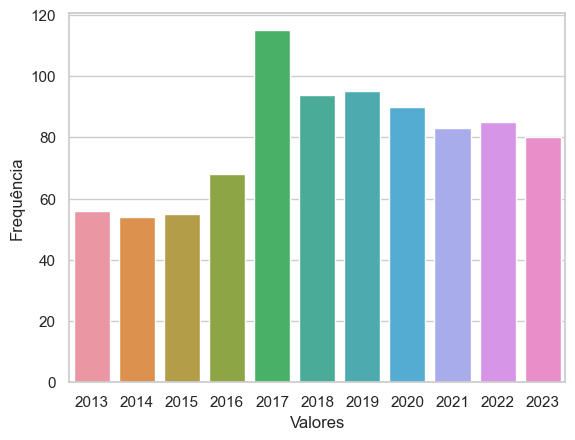

In [198]:
# Para começar a análise dos dados foi relevante enxergar o número de alunos dos cursos de bacharelado no campus Sertãozinho com o decorrer dos anos.
sns.countplot(x = dados['Ano de Ingresso'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10

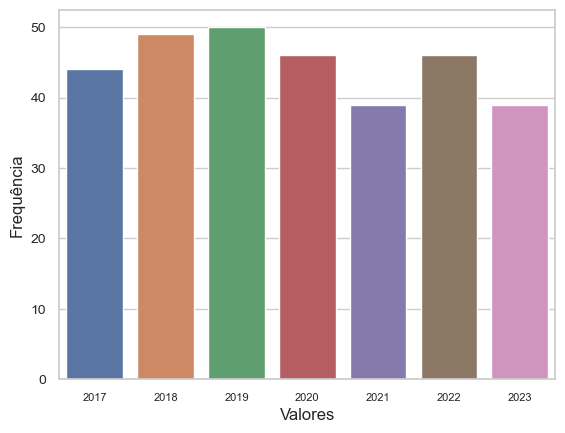

In [201]:
# Para começar a análise dos dados foi relevante enxergar o número de alunos dos cursos de bacharelado no campus Sertãozinho com o decorrer dos anos.
sns.countplot(x = dados_Ele['Ano de Ingresso'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10

# Raça

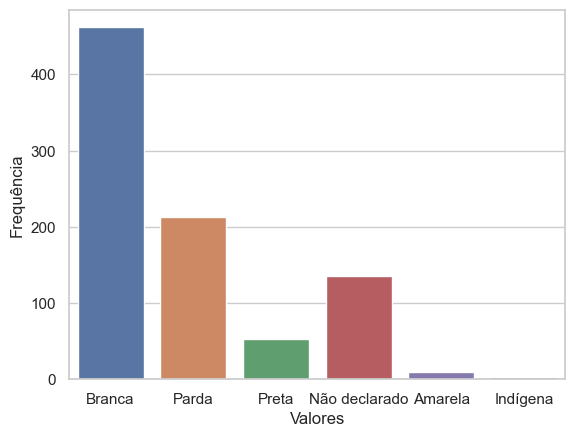

In [137]:
# A primeira informação buscada na análise foi relacionada com raça/etnia/cor, no primeiro gráfico
# é possível observar a quantidade de alunos de cada raça/etnia/cor e também os que não declararam no campus Sertãozinho. 
# Podemos perceber graficamente que o número de brancos é alto em comparação com o restante.
sns.countplot(x = dados['Etnia/Raça/Cor'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

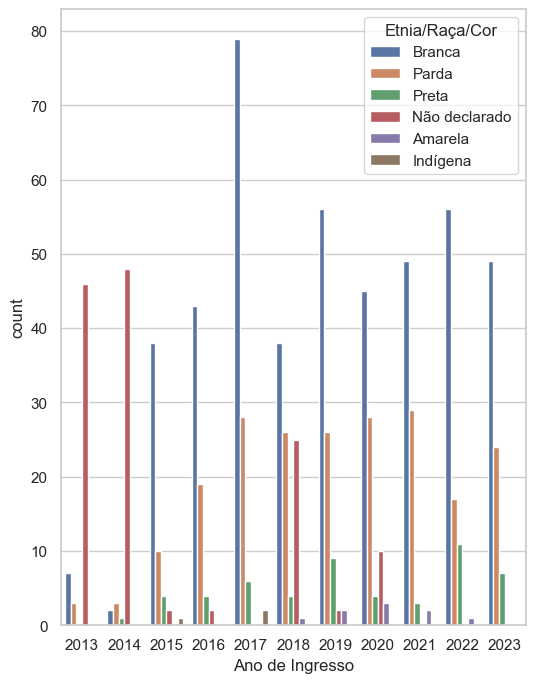

In [203]:
# Após analisarmos a quantidade bruta de alunos com relação a raça/cor/etnia, agora podemos analisar no gráfico 
# a quantidade através dos anos, é possível notar que até dois mil e quinze o alunos quase não se declaravam, após esse ano é possível
# ver que há um aumento significativo no nos alunos se declarando e uma clara diminuição nos que não se declaram.
plt.figure(figsize= (6,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Etnia/Raça/Cor')

plt.show()

In [139]:
dados_Ele['Etnia/Raça/Cor'].value_counts()

Branca           185
Parda             82
Preta             22
Não declarado     20
Amarela            3
Indígena           1
Name: Etnia/Raça/Cor, dtype: int64

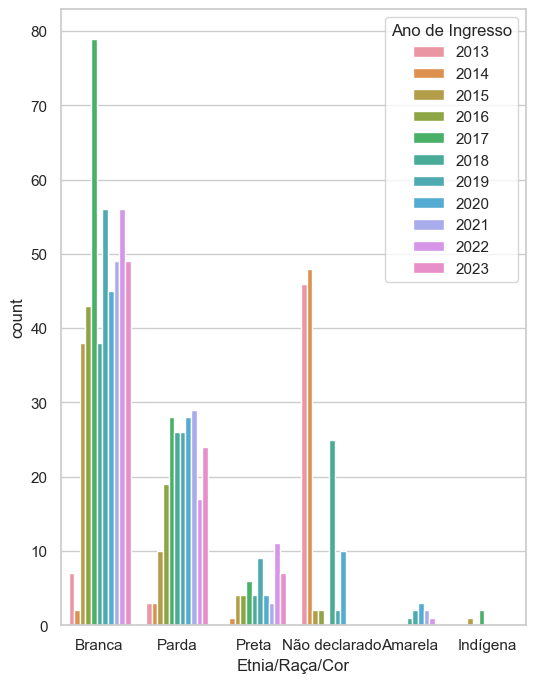

In [202]:
# É relevante se analisar de maneira mais específcas, voltada para os alunos de cursos de bacharel, sobre as questões raciais, afim de obter mais informções 
# importantes para a conclusão do projeto, como por exemplo perceber um alto número de alunos brancos nos ultimos anos, com um ápice grande em dois mil e dezessete.
plt.figure(figsize= (6,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Ano de Ingresso')
plt.show()



<Axes: xlabel='Etnia/Raça/Cor', ylabel='Count'>

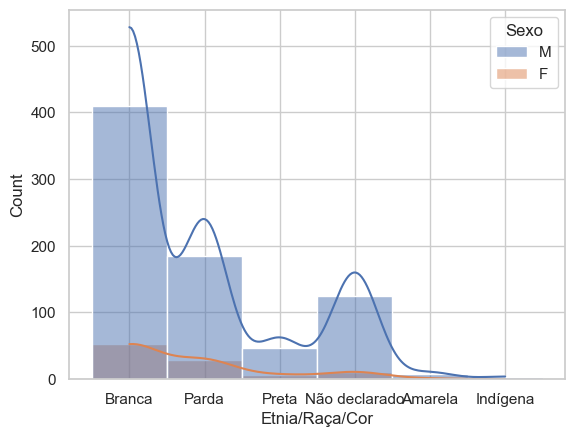

In [141]:
# No gráfico a seguir é analisado a diferença no número de homens e mulheres nos cursos de bacharel e também relacionar com 
# questões raciais/étinicas. Pode-se perceber um grande número de alunos brancos e homens.
sns.histplot(data=dados, x="Etnia/Raça/Cor", hue='Sexo', kde=True)

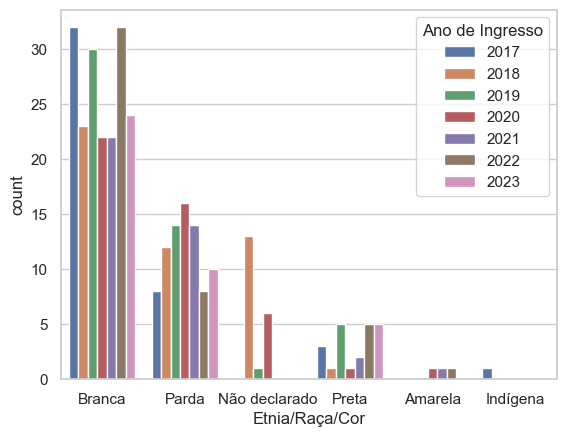

In [142]:
# No próximo gráficos foi filtrado pelo curso de engenharia elétrica, para análise de raça/etnia/cor.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Ele, x='Etnia/Raça/Cor', hue='Ano de Ingresso')
plt.show()

In [143]:
dados_Ele

,#,Matrícula,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Renda Per Capita,Sexo,Situação no Curso,Tipo de Escola de Origem
7,8,ST3059561,2023,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Branca,"SiSU L5 (SGC L3) NaN Candidatos que, independe...",Bacharelado,Brasileira,"3,28",M,Matriculado,Pública
97,98,ST3059677,2023,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,MG,Branca,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,0,M,Matriculado,Pública
106,107,ST3064832,2023,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,Brasileira,"0,62",M,Matriculado,Pública
164,165,ST3045561,2022,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,PB,Parda,Escola Pública + Renda + PPI,Bacharelado,Brasileira,"0,1",F,Matriculado,Pública
186,187,ST306428X,2023,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,MG,Parda,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,0,M,Matriculado,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787,11788,ST3005291,2019,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Branca,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,"0,2",M,Cancelado,Pública
11795,11796,ST3005054,2019,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Parda,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,0,M,Trancado Voluntariamente,Pública
11829,11830,ST3009424,2020,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Amarela,Ampla Concorrência SISU,Bacharelado,Brasileira,"1,59",M,Matriculado,Pública
11880,11881,ST3026507,2021,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,Brasileira,0,F,Matriculado,Pública


In [144]:
dados['Etnia/Raça/Cor'].value_counts()

Branca           462
Parda            213
Não declarado    135
Preta             53
Amarela            9
Indígena           3
Name: Etnia/Raça/Cor, dtype: int64

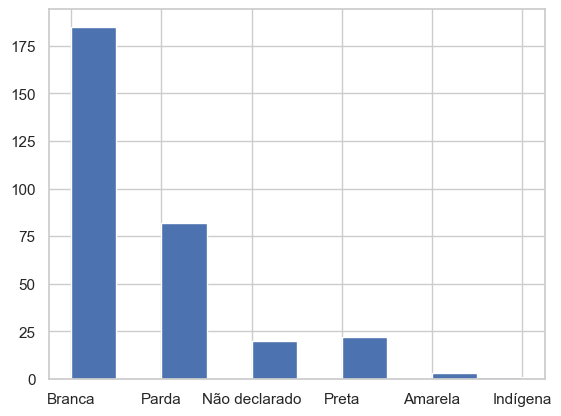

In [145]:
# O gráfico mostra o número geral de raça/etnia/cor para alunos de engenharia elétrica.
plt.hist(x = dados_Ele['Etnia/Raça/Cor']);

# Tipo de escolaridade

<Axes: xlabel='Tipo de Escola de Origem', ylabel='count'>

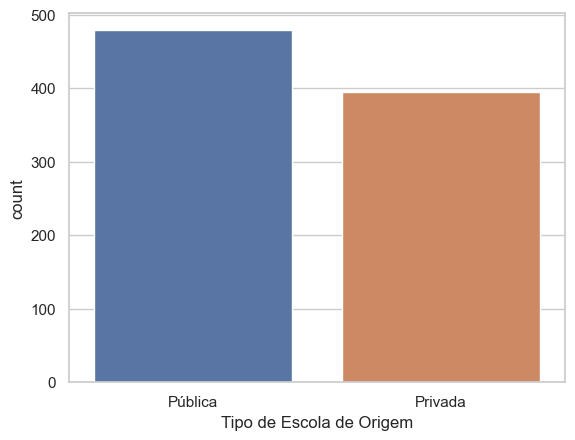

In [146]:
# Neste novo tópico será possivel analisar a escolaridade de origem dos alunos, sendo pública ou privada, uma informação 
# importante para os próximos passos do projeto. No gráfico a seguir existe uma diferença pequena entre público e privado, com público sendo maior. 
sns.countplot(x = dados['Tipo de Escola de Origem'])

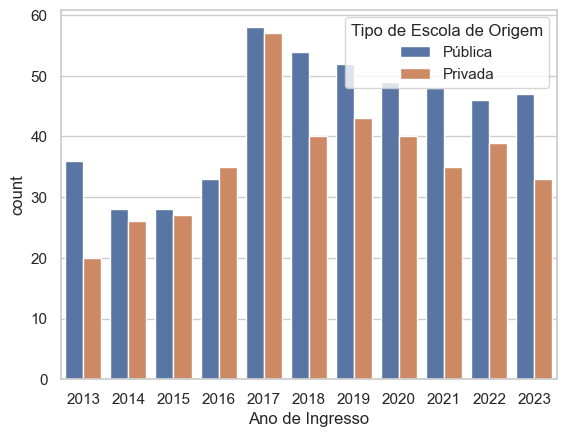

In [147]:
# O gráfico mostra os valores ao longo dos anos com relação a escolaridade de origem dos alunos. 
# É possivél notar um equilíbrio, principalmente em 2017, com um grande número de alunos de escola privada.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Tipo de Escola de Origem')
plt.show()

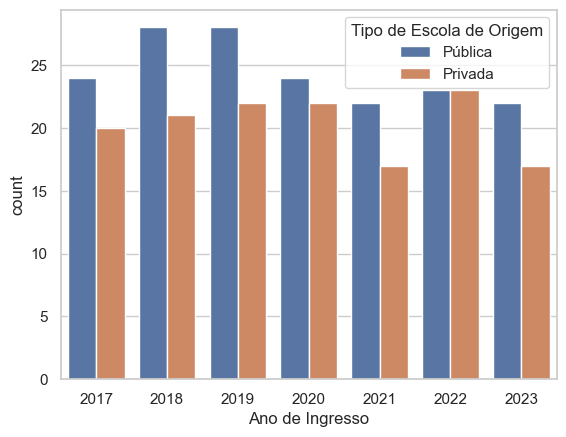

In [231]:
# O gráfico mostra os valores ao longo dos anos com relação a escolaridade de origem dos alunos. 
# É possivél notar um equilíbrio, principalmente em 2017, com um grande número de alunos de escola privada.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Ele, x='Ano de Ingresso', hue='Tipo de Escola de Origem')
plt.show()

In [148]:
dados_Bac['Tipo de Escola de Origem'].value_counts()

Pública    432
Privada    364
Name: Tipo de Escola de Origem, dtype: int64

In [149]:
dados_Pub = dados[dados['Tipo de Escola de Origem']=='Pública']
dados_Pri = dados[dados['Tipo de Escola de Origem']=='Privada']

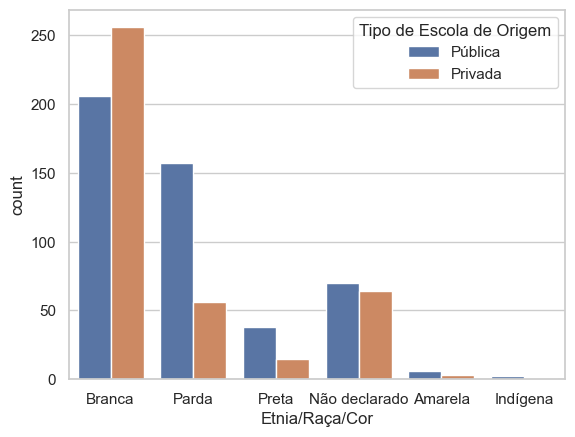

In [150]:
# Outra informação batante relevante para este estudo é mostrado no gráfico abaixo, onde existe uma disparidade pequena entre 
# escolas de origem pública e privada, principalmente entre os alunos brancos e não declarados.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Tipo de Escola de Origem')
plt.show()

In [151]:
dados['Descrição do Curso'].value_counts()

BACHARELADO EM ENGENHARIA MECÂNICA    562
BACHARELADO EM ENGENHARIA ELÉTRICA    313
Name: Descrição do Curso, dtype: int64

In [152]:
dados['Modalidade'].value_counts()

Bacharelado    875
Name: Modalidade, dtype: int64

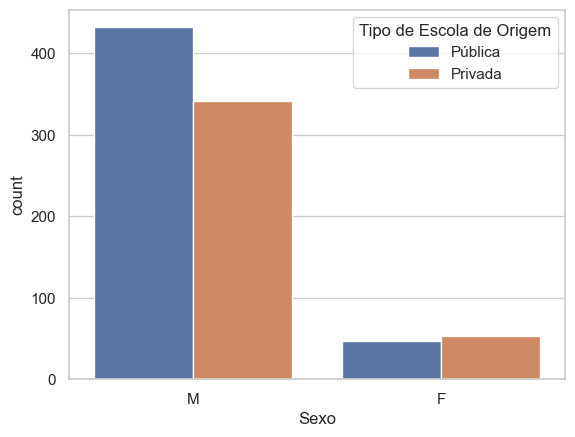

In [153]:
# Nas próximas conclusões que foram possíveis tirar a partir do gráfico abaixo, vemos a diferença entre
# o número de alunos de gênero masculino e feminino com relção a escola de origem, sendo bem perceptível um equilibrio, com mais alunas de escola privada do que pública. .
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Tipo de Escola de Origem')
plt.show()

# Gênero

<Axes: xlabel='Sexo', ylabel='count'>

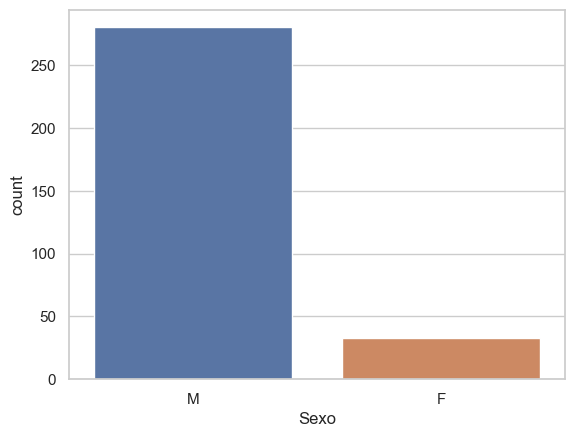

In [154]:
sns.countplot(x = dados_Ele['Sexo'])

<Axes: xlabel='Sexo', ylabel='count'>

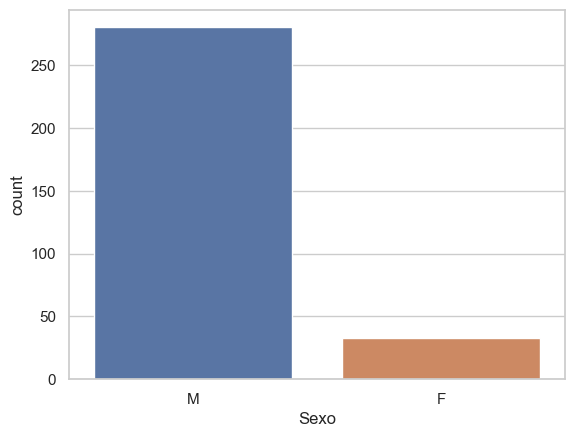

In [155]:
# Agora será feita uma ánalise sobre questões de gênero. Primeiro o gráfico a seguir mostra uma disparidade enorme entre o número geral de 
# homens e mulheres no campus.
sns.countplot(x = dados_Ele['Sexo'])

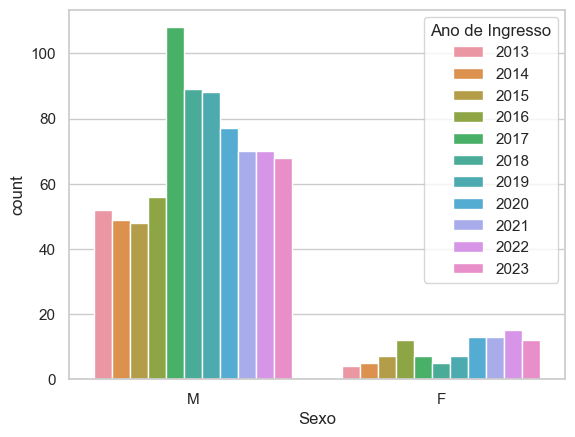

In [156]:
# O gráfico a seguir mostra a relacão de gênero ao longo dos anos, provando a alta disparidade entre homens e mulheres. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Ano de Ingresso')
plt.show()

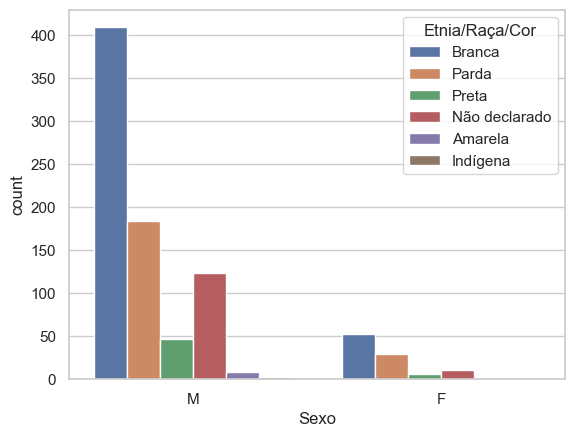

In [157]:
# Com relação a raça, o gráfico a seguir mostra, assim como analisado anteriormente, um grande número de alunos brancos e seguidos 
# por alunos pardos com uma certa distância.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Etnia/Raça/Cor')
plt.show()

In [158]:
dados_M = dados[dados['Sexo']=='M']
dados_F = dados[dados['Sexo']=='F']

# Evasão

In [159]:
dados['Situação no Curso'].value_counts()

Matriculado                        335
Evasão                             191
Cancelado                          164
Formado                            144
Matrícula Vínculo Institucional     20
Transferido Interno                  8
Trancado Voluntariamente             6
Transferido Externo                  5
Cancelamento Compulsório             1
Trancado                             1
Name: Situação no Curso, dtype: int64

In [160]:
dados_Evas = dados[dados['Situação no Curso']=='Evasão']
dados_EleEvas = dados_Ele[dados_Ele['Situação no Curso']=='Evasão']

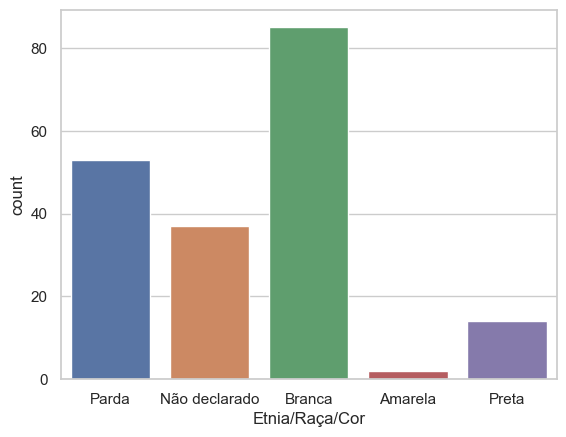

In [161]:
# O tópico de evasão é um dos mais importantes do projeto, nele pode-se observar algumas informações que serão muito importante para as 
# conclusões, no gráfico a seguir foi filtrado uma base de dados só com os alunos que evadiram em relação a raça/etnia/cor.
sns.countplot(x = dados_Evas['Etnia/Raça/Cor'])
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 15

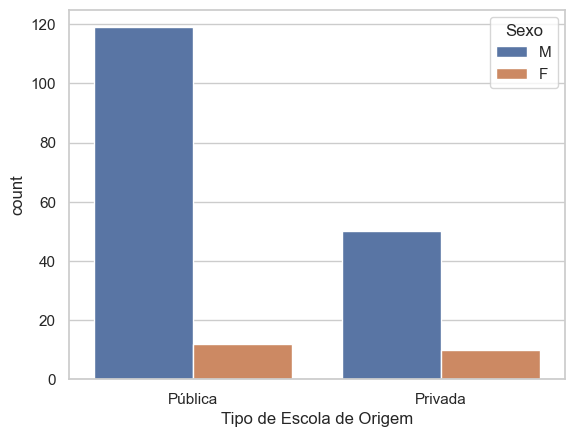

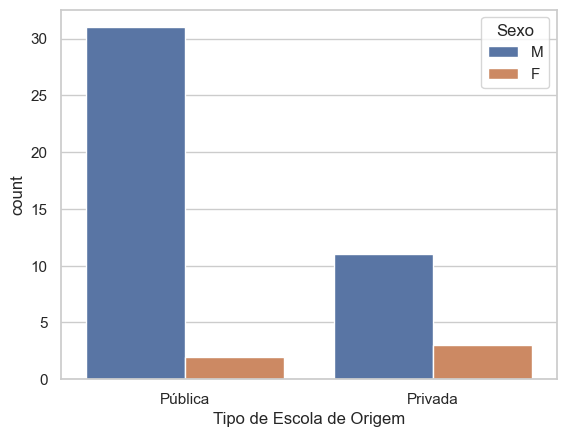

In [162]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública, maior do que a proporção de pública e privada no geral, e
# também é notávle que homens evadem mais, informação relacionada principalmente com a baixa quantidade de mulheres nos cursos. 
# Agora focado na engenharia elétrica, mostra um gráfico parecido, mas com menos mulheres de escola pública evadindo.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_EleEvas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()

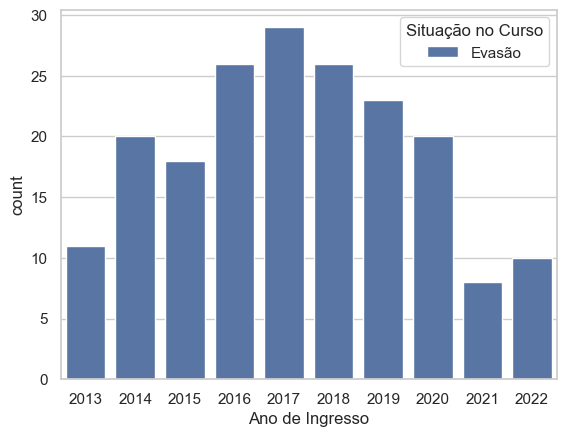

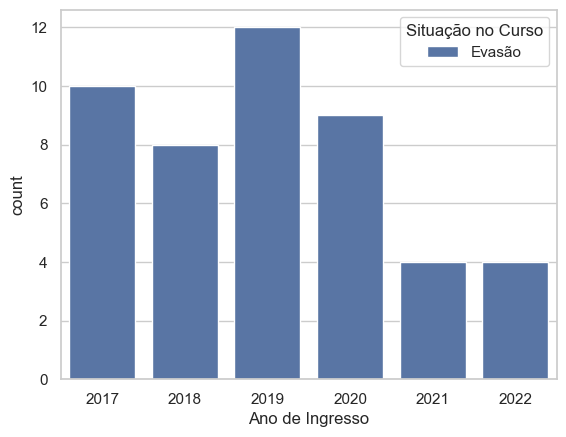

In [163]:
# Agora será analisado o número geral de evadidos, em todos os cursos e modalidades do campus, ao passar dos anos, 
# peecebendo um ápice em 2017 e uma queda nos anos de pandemia, 2021 e 2022.
# Já os alunos de elétrica tiveram um ápice de evasão em 2019.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Situação no Curso')
plt.show()
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_EleEvas, x='Ano de Ingresso', hue='Situação no Curso')
plt.show()

# Deficiência

In [164]:
dados_Def = dados[dados['Deficiência']=='PCD']

In [165]:
dados['Deficiência'].value_counts()

Sem Necessidade Especial    869
PCD                           6
Name: Deficiência, dtype: int64

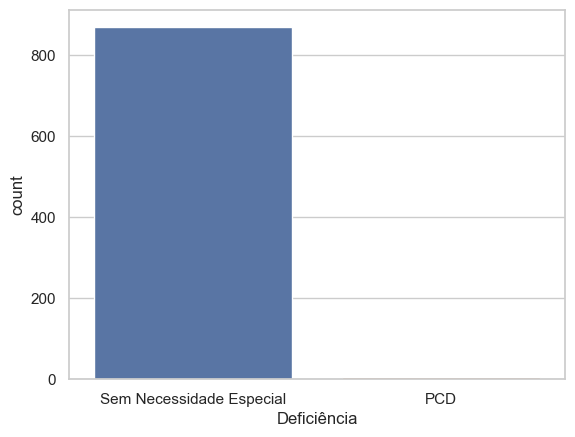

In [166]:
# O tópico de pessoas com deficiêcia (PCD) é importante para analisarmos o avanço do número geral desses alunos no campus 
# e muito importante para mostrar os avanços de acessibilidade do campus. No gráfico a seguir podemos ver a comparação de alunos PCD com alunos
# sem necessidades especiais.
sns.countplot(x = dados['Deficiência'])
plt.rcParams['xtick.labelsize'] = 8

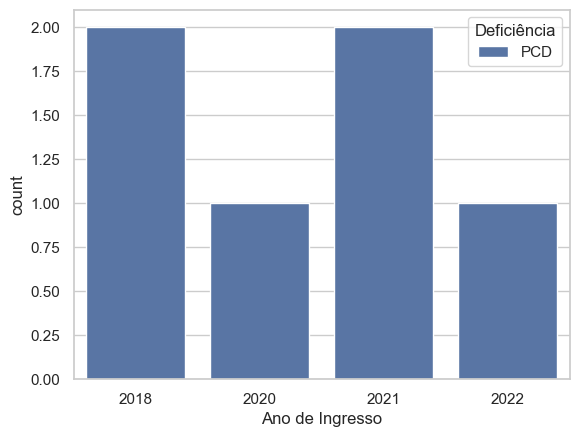

In [167]:
# A seguir será analisado a evolução no número de alunos PCD ao passar dos anos, mantendo uma quantidade bem pequena, variando de 2 para 1 alunos.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Ano de Ingresso', hue='Deficiência')
plt.show()

In [168]:
dados_Def['Ano de Ingresso'].value_counts()

2018    2
2021    2
2022    1
2020    1
Name: Ano de Ingresso, dtype: int64

# Regras de Associação

In [169]:
!pip install apyori

In [170]:
import pandas as pd
from apyori import apriori


In [171]:
dados['Situação no Curso'].value_counts()

Matriculado                        335
Evasão                             191
Cancelado                          164
Formado                            144
Matrícula Vínculo Institucional     20
Transferido Interno                  8
Trancado Voluntariamente             6
Transferido Externo                  5
Cancelamento Compulsório             1
Trancado                             1
Name: Situação no Curso, dtype: int64

In [172]:
# Alunos evadidos do bacharelado
dados_Evas

,#,Matrícula,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Sexo,Situação no Curso,Tipo de Escola de Origem
101,102,ST1713566,2017,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Parda,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,M,Evasão,Pública
116,117,ST1613294,2016,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Parda,Matrícula Direta (Inativa),Bacharelado,Brasileira,M,Evasão,Pública
137,138,ST3005623,2019,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,Brasileira,M,Evasão,Pública
190,191,ST3012387,2020,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,Brasileira,M,Evasão,Pública
312,313,ST1313347,2013,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,Brasileira,M,Evasão,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,11636,ST3005305,2019,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA ELÉTRICA,SP,Branca,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,Brasileira,M,Evasão,Pública
11697,11698,ST3045609,2022,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Branca,Escola Pública + Renda,Bacharelado,Brasileira,M,Evasão,Pública
11763,11764,ST1613219,2016,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Parda,SiSU L6 (SGC L4) NaN Candidatos autodeclarados...,Bacharelado,Brasileira,M,Evasão,Pública
11806,11807,ST1313533,2013,Sem Necessidade Especial,BACHARELADO EM ENGENHARIA MECÂNICA,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,Brasileira,M,Evasão,Pública


In [173]:
dados_Evas = dados_Evas.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [174]:
dados_Evas.shape

(191, 9)

In [175]:
dados.shape

(875, 13)

In [176]:
Lista = []
for i in range(len(dados_Evas)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Evas.values[i, j]) for j in range(dados_Evas.shape[1])])

In [177]:
regras = apriori(Lista, min_support = 0.1, min_confidence = 0.2, min_lift = 2)
resultados = list(regras)
len(resultados)

9

In [178]:
resultados

[RelationRecord(items=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)', 'BACHARELADO EM ENGENHARIA MECÂNICA', 'Não declarado'}), support=0.13089005235602094, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Não declarado'}), items_add=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)', 'BACHARELADO EM ENGENHARIA MECÂNICA'}), confidence=0.6756756756756757, lift=2.2641062114746324), OrderedStatistic(items_base=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)'}), items_add=frozenset({'BACHARELADO EM ENGENHARIA MECÂNICA', 'Não declarado'}), confidence=0.3787878787878788, lift=2.0096801346801345), OrderedStatistic(items_base=frozenset({'BACHARELADO EM ENGENHARIA MECÂNICA', 'Não declarado'}), items_add=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)'}), confidence=0.6944444444444444, lift=2.009680134680135), OrderedStatistic(items_base=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)', 'BACHARELADO EM ENGENHARIA MECÂNICA'}), items_add=frozenset({'Não declarado

In [181]:
# Alunos evadidos de engenharia elétrica
dados_EleEvas = dados_EleEvas.drop(["Situação no Curso","Deficiência","Nacionalidade","Descrição do Curso"],axis = 1)

In [182]:
dados_EleEvas = dados_EleEvas.drop(["Modalidade"],axis = 1)

In [183]:
dados_EleEvas = dados_EleEvas.drop(["Renda Per Capita"],axis = 1)

In [184]:
dados_EleEvas

,#,Matrícula,Ano de Ingresso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Sexo,Tipo de Escola de Origem
190,191,ST3012387,2020,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,M,Pública
881,882,ST3002497,2018,SP,Parda,Seleção Geral Graduação (SiSU) (Inativa),M,Pública
1091,1092,ST3002357,2018,SP,Parda,Seleção Geral Graduação (SiSU) (Inativa),M,Pública
1253,1254,ST300595X,2019,SP,Parda,SiSU L6 (SGC L4) NaN Candidatos autodeclarados...,M,Pública
1593,1594,ST1715151,2017,SP,Preta,SiSU L6 (SGC L4) NaN Candidatos autodeclarados...,M,Pública
1618,1619,ST3002772,2018,SP,Branca,Transferência Facultativa,M,Privada
1919,1920,ST3004783,2019,SP,Branca,"SiSU L5 (SGC L3) NaN Candidatos que, independe...",M,Pública
1952,1953,ST3004341,2019,SP,Parda,Ampla Concorrência SISU,M,Privada
2249,2250,ST3006981,2019,SP,Branca,Ingresso de portador de diploma de graduação,M,Pública
2268,2269,ST3047946,2022,SP,Parda,Processo Seletivo Simplificado NaN Ampla Conco...,F,Pública


In [247]:
Lista = []
for i in range(len(dados_EleEvas)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_EleEvas.values[i, j]) for j in range(dados_EleEvas.shape[1])])

In [248]:
regras = apriori(Lista, min_support = 0.12, min_confidence = 0.2, min_lift = 2)
resultados = list(regras)
len(resultados)

10

In [249]:
resultados

[RelationRecord(items=frozenset({'Parda', 'SiSU L6 (SGC L4) NaN Candidatos autodeclarados pretos, pardos ou indígenas que, independente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº12.711/2012)'}), support=0.1276595744680851, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Parda'}), items_add=frozenset({'SiSU L6 (SGC L4) NaN Candidatos autodeclarados pretos, pardos ou indígenas que, independente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº12.711/2012)'}), confidence=0.3529411764705882, lift=2.0735294117647056), OrderedStatistic(items_base=frozenset({'SiSU L6 (SGC L4) NaN Candidatos autodeclarados pretos, pardos ou indígenas que, independente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº12.711/2012)'}), items_add=frozenset({'Parda'}), 

In [206]:
# Alunos formados em engenharia elétrica
dados_EleForm = dados_Ele[dados_Ele['Situação no Curso']=='Formado']

In [221]:
dados_EleForm

,#,Matrícula,Ano de Ingresso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Renda Per Capita,Sexo,Tipo de Escola de Origem
929,930,ST1715194,2017,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,"1,07",M,Pública
1209,1210,ST3001954,2018,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,NaN,M,Privada
1665,1666,ST171533X,2017,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,"1,14",M,Privada
1951,1952,ST3007189,2019,SP,Branca,Transferência Facultativa,Bacharelado,2,M,Privada
2438,2439,ST1715437,2017,SP,Branca,"SiSU L5 (SGC L3) NaN Candidatos que, independe...",Bacharelado,"1,33",M,Pública
2744,2745,ST3000818,2018,SP,Não declarado,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,"0,45",M,Pública
3004,3005,ST3002365,2018,SP,Branca,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Bacharelado,"1,4",M,Pública
3059,3060,ST1715291,2017,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,"1,25",M,Privada
3637,3638,ST1715216,2017,SP,Parda,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Bacharelado,"0,4",M,Pública
3684,3685,ST1715372,2017,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,"1,55",M,Privada


In [254]:
dados_EleForm = dados_EleForm.drop(["Situação no Curso","Deficiência","Nacionalidade","Descrição do Curso"],axis = 1)

KeyError: "['Situação no Curso', 'Deficiência', 'Nacionalidade', 'Descrição do Curso'] not found in axis"

In [255]:
dados_EleForm = dados_EleForm.drop(["Modalidade"],axis = 1)

In [256]:
Lista = []
for i in range(len(dados_EleForm)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_EleForm.values[i, j]) for j in range(dados_EleForm.shape[1])])

In [258]:
regras = apriori(Lista, min_support = 0.25, min_confidence = 0.3, min_lift = 2)
resultados = list(regras)
len(resultados)

6

In [259]:
resultados

[RelationRecord(items=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)', 'Privada'}), support=0.37142857142857144, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Privada'}), items_add=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)'}), confidence=0.9285714285714286, lift=2.321428571428571), OrderedStatistic(items_base=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)'}), items_add=frozenset({'Privada'}), confidence=0.9285714285714286, lift=2.321428571428571)]),
 RelationRecord(items=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)', 'Privada', 'Branca'}), support=0.2571428571428571, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Privada'}), items_add=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)', 'Branca'}), confidence=0.6428571428571428, lift=2.25), OrderedStatistic(items_base=frozenset({'Seleção Geral Graduação (SiSU) (Inativa)'}), items_add=frozenset({'Privada', 'Branca'}), confidence=0.6428571428571428, lift=2.25), OrderedStatistic(

In [223]:
# Alunos formados do bacharelado
dados_Form = dados.loc[dados['Situação no Curso'] == 'Formado']
dados_Form = dados_Form.drop(["Situação no Curso","Deficiência","Nacionalidade","Descrição do Curso"],axis = 1)

In [238]:
dados_Form = dados_Form.drop(["Modalidade"],axis = 1)

In [239]:
Lista = []
for i in range(len(dados_Form)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Form.values[i, j]) for j in range(dados_Form.shape[1])])

In [241]:
regras = apriori(Lista, min_support = 0.12, min_confidence = 0.3, min_lift = 2)
resultados = list(regras)
len(resultados)

6

In [242]:
resultados

[RelationRecord(items=frozenset({'Não declarado', '2013'}), support=0.13194444444444445, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2013'}), items_add=frozenset({'Não declarado'}), confidence=0.6785714285714286, lift=2.5714285714285716), OrderedStatistic(items_base=frozenset({'Não declarado'}), items_add=frozenset({'2013'}), confidence=0.5, lift=2.571428571428571)]),
 RelationRecord(items=frozenset({'Não declarado', 'M', '2013'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2013'}), items_add=frozenset({'Não declarado', 'M'}), confidence=0.6428571428571428, lift=2.644897959183673), OrderedStatistic(items_base=frozenset({'Não declarado'}), items_add=frozenset({'M', '2013'}), confidence=0.47368421052631576, lift=2.728421052631579), OrderedStatistic(items_base=frozenset({'M', '2013'}), items_add=frozenset({'Não declarado'}), confidence=0.72, lift=2.7284210526315786), OrderedStatistic(items_base=frozenset({'Não declarado', 'M'}), items_add=fr